**STEP 1: Import Library**

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


**STEP 2: Drive Mount and Dataset Upload**

In [13]:
from google.colab import drive
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/datasets/animals.zip'
extract_path = '/content/animals'
# Your dataset path (update this to match your actual folder in Drive)
dataset_path = '/content/drive/MyDrive/datasets/animals'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm folder structure
print("Extracted folders:", os.listdir(extract_path))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted folders: ['animals']


**STEP 3: Load & Preprocess Images**

In [15]:
IMG_SIZE = 64  # Resize all to 64x64
X, y = [], []

labels_map = {"cats": 0, "dogs": 1, "panda": 2}
data_dir = os.path.join(extract_path, 'animals')  # /content/animals/animals

for label_name, label_id in labels_map.items():
    folder = os.path.join(data_dir, label_name)
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        img = cv2.imread(file_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())  # Flatten for basic ML model
            y.append(label_id)

X = np.array(X)
y = np.array(y)

print("Loaded images:", X.shape)


Loaded images: (300, 12288)


**STEP 4: Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


**STEP 5: Train Basic KNN**

In [31]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


# Print classification report for best K
print(f"Classification Report (K={best_k}):\n")
print(classification_report(y_test, y_pred, target_names=labels_map.keys()))


Classification Report (K=1):

              precision    recall  f1-score   support

        cats       0.46      0.40      0.43        30
        dogs       0.33      0.67      0.44        30
       panda       0.67      0.07      0.12        30

    accuracy                           0.38        90
   macro avg       0.49      0.38      0.33        90
weighted avg       0.49      0.38      0.33        90



**Step 6: Confusion Matrix for Best K**

Best K: 1


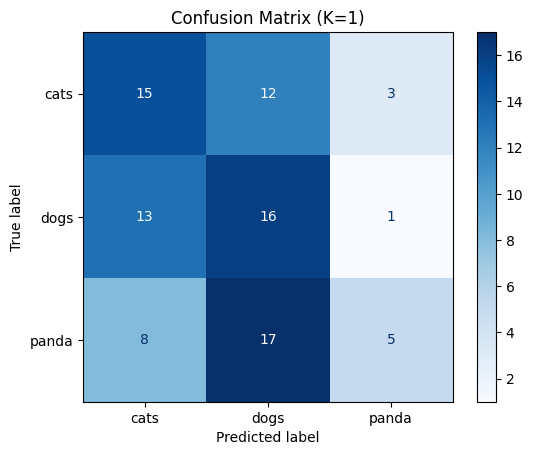

In [33]:
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)


final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_map.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


**STEP 7: Accuracy Plot**

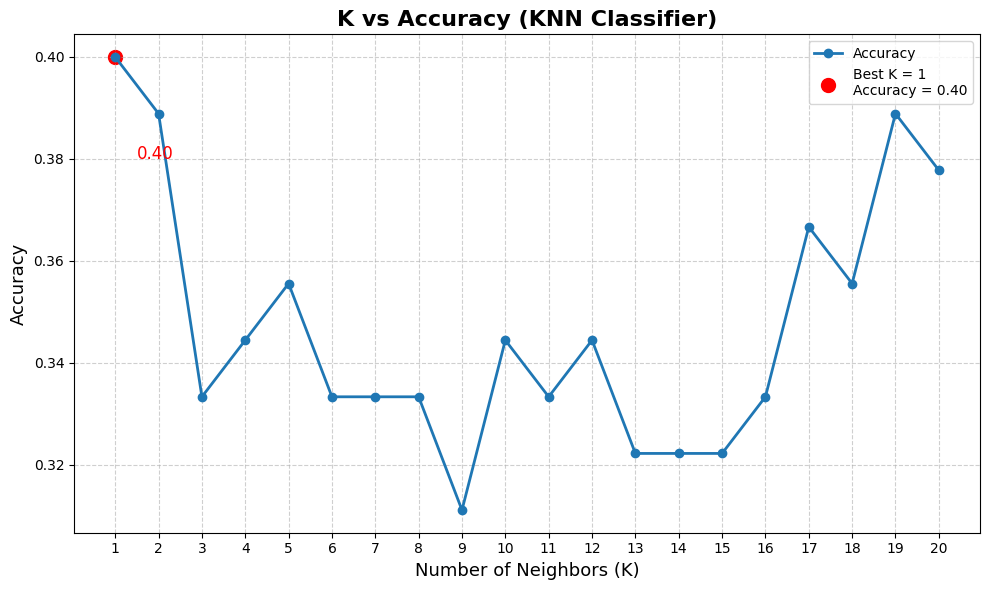

In [34]:
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='#1f77b4', linewidth=2, label='Accuracy')

# Highlight the best K with red dot
plt.scatter(best_k, best_acc, color='red', s=100, label=f'Best K = {best_k}\nAccuracy = {best_acc:.2f}')
plt.text(best_k + 0.5, best_acc - 0.02, f"{best_acc:.2f}", fontsize=12, color='red')

# Add grid and labels
plt.title("K vs Accuracy (KNN Classifier)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Neighbors (K)", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
